<font style='font-size:1.5em'>**💻 Week 03 Lab (✅ Solutions)** </font>

<font style='font-size:1.2em'>LSE DS105A – Data for Data Science (2024/25)</font>

**DATE:** 21 October 2024

**AUTHORS:**  

- Jon

**OBJECTIVE**: Provide a possible solution to the Week 03 Lab using lots of Python functions.


<div style="background-color: #fff; margin-top:1em;border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1); padding: 0.75em; flex: 1 1 calc(45% - 20px);align-items:middle;box-sizing: border-box;font-size:0.9em;width:300px">

📝 **Note:** there won't be any solutions for the Bonus Task or Challenge Task. 

But we will be more than happy to assist you in solving those. Just post your questions to Slack or attend a support session.
</div>

---

In [1]:
import json

import pandas as pd

# 1. Reading Data

I have already collected the data I need for my analysis in NB01. I will just read it here:

In [2]:
with open('../data/open-meteo/daily_temp.json', 'r') as file:
    data = json.load(file)

data.keys()

dict_keys(['country', 'city', 'date', 'min_temp', 'max_temp'])

# 2. Convert data to a table



In [3]:
df = pd.DataFrame(data)

# How does the data look like?
df.head()

,country,city,date,min_temp,max_temp
0,GB,London,2023-01-01,8.5,11.9
1,GB,London,2023-01-02,1.0,8.3
2,GB,London,2023-01-03,2.2,12.4
3,GB,London,2023-01-04,9.9,13.1
4,GB,London,2023-01-05,7.8,12.9


<div style="margin-left:2.5em">

☝️

It's nice to see that the `country` and `city` variables got replicated to all lines. That's neat.

</div>


In [4]:
# This confirms that I have 365 distinct elements
# and that the final date is 12 Dec 2023, just what I expected
df.tail()

,country,city,date,min_temp,max_temp
360,GB,London,2023-12-27,6.7,12.0
361,GB,London,2023-12-28,9.0,11.7
362,GB,London,2023-12-29,5.8,10.6
363,GB,London,2023-12-30,5.1,11.5
364,GB,London,2023-12-31,6.4,10.2


<Axes: xlabel='date'>

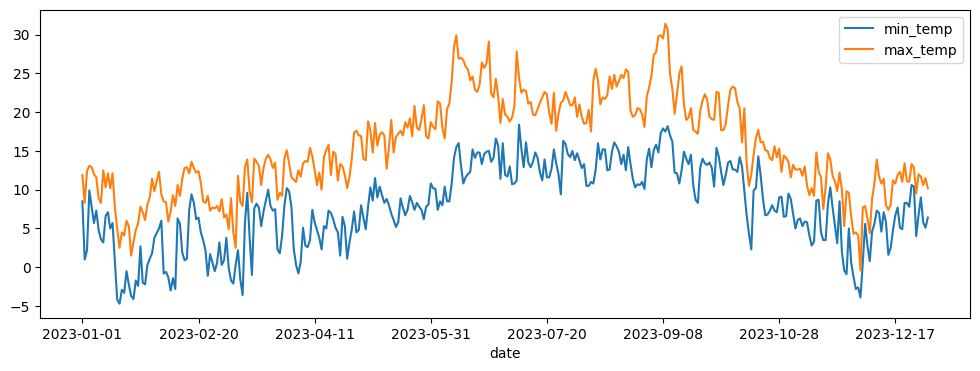

In [5]:
# I wonder if I can change the way the dates are written on this plot
df.plot(x='date', y=['min_temp', 'max_temp'], figsize=(12, 4))

# 3. Investigating min and max temperatures

In [6]:
print(f"The minimum temperature last year was: {df['min_temp'].min()}")
print(f"The maximum temperature last year was: {df['max_temp'].max()}")

The minimum temperature last year was: -4.7
The maximum temperature last year was: 31.4


### The pure Python way of doing this

I know that I can get an entire column of the Data Frame (the `df` table) as a list. 

I know how to work with lists!

In [7]:
min_temps = df['min_temp'].tolist()
len(min_temps)

365

To keep track of _when_ the minimum temperature happened, I will:

- Initialise a variable `year_min_temp` with an absurdly super huge value at first

- Then, I will do a `for` loop over the `min_temps` lists and every time I find a smaller temperature, I will update the `year_min_temp`

- Whenever I update the `year_min_temp`, I will also update a variable called `year_min_index` so that I know when in the year I saw the year's minimum temperature

In [8]:
year_min_temp = 10000
year_min_index = None
current_index = 0

for min_temp in min_temps:
    if min_temp < year_min_temp:
        print(f"Temperature at index {current_index} is: {min_temp:+02.1f}, which is smaller than {year_min_temp}. Updating `year_min_temp` variable")
        year_min_temp = min_temp
        year_min_index = current_index

    # No matter what happens, add one to the current_index
    current_index = current_index + 1

# After the loop, print:
print(f"The minimum temperature of 2023 ({year_min_temp}), happened on index {year_min_index}")

Temperature at index 0 is: +8.5, which is smaller than 10000. Updating `year_min_temp` variable
Temperature at index 1 is: +1.0, which is smaller than 8.5. Updating `year_min_temp` variable
Temperature at index 14 is: +0.8, which is smaller than 1.0. Updating `year_min_temp` variable
Temperature at index 15 is: -4.2, which is smaller than 0.8. Updating `year_min_temp` variable
Temperature at index 16 is: -4.7, which is smaller than -4.2. Updating `year_min_temp` variable
The minimum temperature of 2023 (-4.7), happened on index 16


Equipped with the knowledge of when the date is, we can look at the `df['date']` list to print out the exact date this index represents:

In [9]:
df['date'][year_min_index]

'2023-01-17'

The logic would be very similar to find the maximum temperature of 2023.

**Alternative 2:**

Here's an alternative way using the `range()` function in Python.

With `range()` I don't need to keep incrementing the `current_index` variable 'manually':

In [10]:
year_min_temp = 10000
year_min_index = None

for current_index in range(len(min_temps)):

    # Get the temperature that is at this position
    min_temp = min_temps[current_index]

    if min_temp < year_min_temp:
        print(f"Temperature at index {current_index} is: {min_temp:+02.1f}, which is smaller than {year_min_temp}. Updating `year_min_temp` variable")
        year_min_temp = min_temp
        year_min_index = current_index

# After the loop, print:
print(f"The minimum temperature of 2023 ({year_min_temp}), happened on {df['date'][year_min_index]}")

Temperature at index 0 is: +8.5, which is smaller than 10000. Updating `year_min_temp` variable
Temperature at index 1 is: +1.0, which is smaller than 8.5. Updating `year_min_temp` variable
Temperature at index 14 is: +0.8, which is smaller than 1.0. Updating `year_min_temp` variable
Temperature at index 15 is: -4.2, which is smaller than 0.8. Updating `year_min_temp` variable
Temperature at index 16 is: -4.7, which is smaller than -4.2. Updating `year_min_temp` variable
The minimum temperature of 2023 (-4.7), happened on 2023-01-17


**Alternative 3:**

Another helpful function to use with `for` loops is `enumerate()`. It returns the current index and the current value for me: 

In [11]:
year_min_temp = 10000
year_min_index = None

for current_index, min_temp in enumerate(min_temps):

    if min_temp < year_min_temp:
        print(f"Temperature at index {current_index} is: {min_temp:+02.1f}, which is smaller than {year_min_temp}. Updating `year_min_temp` variable")
        year_min_temp = min_temp
        year_min_index = current_index

# After the loop, print:
print(f"The minimum temperature of 2023 ({year_min_temp}), happened on {df['date'][year_min_index]}")

Temperature at index 0 is: +8.5, which is smaller than 10000. Updating `year_min_temp` variable
Temperature at index 1 is: +1.0, which is smaller than 8.5. Updating `year_min_temp` variable
Temperature at index 14 is: +0.8, which is smaller than 1.0. Updating `year_min_temp` variable
Temperature at index 15 is: -4.2, which is smaller than 0.8. Updating `year_min_temp` variable
Temperature at index 16 is: -4.7, which is smaller than -4.2. Updating `year_min_temp` variable
The minimum temperature of 2023 (-4.7), happened on 2023-01-17


### The pandas way of doing things

Pandas is a powerful tool for data analysis. This library was built to simplify common tasks one has to perform when working with data.

We can discover the `year_min_index` a lot simpler with pandas. We just need to use the `.idxmin()` method:

In [12]:
df['min_temp'].idxmin()

16

Therefore, a full pandas-powered solution would look like this:

In [13]:
year_min_index = df['min_temp'].idxmin()
year_min_temp  = df['min_temp'][year_min_index]
year_min_date  = df['date'][year_min_index]

year_max_index = df['max_temp'].idxmax()
year_max_temp  = df['max_temp'][year_max_index]
year_max_date  = df['date'][year_max_index]

print(f"The minimum temperature happened on {year_min_date} and it was {year_min_temp}")
print(f"The maximum temperature happened on {year_max_date} and it was {year_max_temp}")

The minimum temperature happened on 2023-01-17 and it was -4.7
The maximum temperature happened on 2023-09-09 and it was 31.4


----

I wonder what else can pandas simplify for me